### SSW-related superficial stats testing

In [1]:
import numpy as np
import math
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet 
import scipy.stats

In [2]:
##this is a wrapper function I got from 
#https://stackoverflow.com/questions/41045752/using-statsmodel-estimations-with-scikit-learn-cross-validation-is-it-possible
##the purpose of including this is to cross validate models 

from sklearn.base import BaseEstimator, RegressorMixin

class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
        return self
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

In [4]:
infile = open("./1979ERAdata/gph_97.p", 'rb')
gph = pickle.load(infile)
infile.close()

infile = open("./1979ERAdata/gph_time_97.p", 'rb')
gph_time = pickle.load(infile)
infile.close()

infile = open("./1979ERAdata/temp850_97.p", 'rb')
temp = pickle.load(infile)
infile.close()

infile = open("./1979ERAdata/temp850_time_97.p", 'rb')
temp_time = pickle.load(infile)
infile.close()

infile = open("./1979ERAdata/gph_time_97.p", 'rb')
gph_time = pickle.load(infile)
infile.close()

infile = open("./1979ERAdata/gph_time_97.p", 'rb')
gph_time = pickle.load(infile)
infile.close()

infile = open("./1979ERAdata/gph_lat_97.p", 'rb')
gph_lat = pickle.load(infile)
infile.close()

infile = open("./1979ERAdata/gph_lon_97.p", 'rb')
gph_lon = pickle.load(infile)
infile.close()

In [5]:
infile = open("../Clusters/Fall2023Clustering/UW_lat.p", 'rb')
unweighted_lat = pickle.load(infile)
infile.close()

infile = open("../Clusters/Fall2023Clustering/UW_lon.p", 'rb') 
unweighted_lon = pickle.load(infile)
infile.close()

In [6]:
gph = xr.DataArray(data= gph, 
                       dims = ["time","lat","lon"],
                       coords = dict(
                           time = gph_time,
                           lat = unweighted_lat,
                           lon = unweighted_lon)
                      )
gph_D = gph.groupby('time.date').mean()

gph

<xarray.DataArray (time: 24320, lat: 128, lon: 512)>
array([[[30898.127, 30898.383, 30899.045, ..., 30899.605, 30898.791,
         30898.28 ],
        [30898.434, 30898.791, 30899.504, ..., 30899.76 , 30898.893,
         30898.434],
        [30898.484, 30899.146, 30899.912, ..., 30899.504, 30898.586,
         30898.28 ],
        ...,
        [29642.959, 29642.092, 29641.174, ..., 29645.764, 29644.846,
         29643.877],
        [29671.715, 29671.104, 29670.49 , ..., 29673.602, 29672.938,
         29672.326],
        [29701.693, 29701.389, 29701.133, ..., 29702.56 , 29702.256,
         29701.95 ]],

       [[30859.053, 30856.707, 30854.465, ..., 30865.223, 30863.438,
         30861.348],
        [30855.79 , 30853.445, 30851.303, ..., 30863.133, 30861.092,
         30858.441],
        [30853.037, 30850.793, 30848.906, ..., 30860.889, 30858.695,
         30855.842],
...
        [29473.12 , 29473.68 , 29474.24 , ..., 29471.588, 29472.098,
         29472.61 ],
        [29501.16 , 29501.467, 29501.824, ..., 29500.191, 29500.498,
         29500.803],
        [29530.63 , 29530.783, 29530.936, ..., 29530.223, 29530.324,
         29530.477]],

       [[30907.75 , 30908.31 , 30909.28 , ..., 30905.354, 30906.578,
         30907.24 ],
        [30905.1  , 30905.762, 30906.73 , ..., 30902.703, 30903.621,
         30904.334],
        [30902.295, 30903.06 , 30903.824, ..., 30900.459, 30900.918,
         30901.428],
        ...,
        [29456.133, 29456.643, 29457.154, ..., 29454.654, 29455.113,
         29455.623],
        [29484.482, 29484.787, 29485.094, ..., 29483.564, 29483.87 ,
         29484.176],
        [29514.46 , 29514.562, 29514.717, ..., 29514.053, 29514.156,
         29514.309]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-11-01 ... 2019-04-01T18:00:00
  * lat      (lat) float32 0.3509 1.053 1.754 2.456 ... 87.37 88.07 88.77 89.46
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3

In [7]:
#calculate daily mean values
daily_mean_gph = gph.groupby('time.dayofyear').mean()
#test gph anomaly
daily_anom_gph = gph.groupby('time.dayofyear') - daily_mean_gph

##straight gph cap values
g_cap = gph.sel(lat = slice(60,90))

#anomaly cap values
cap_mean_gph = g_cap.groupby('time.dayofyear').mean()
#test gph anomaly
cap_anom_gph = g_cap.groupby('time.dayofyear') - cap_mean_gph
cap_anom_gph

<xarray.DataArray (time: 24320, lat: 42, lon: 512)>
array([[[-174.88086 , -165.70508 , -156.59375 , ..., -202.39648 ,
         -193.33008 , -184.20508 ],
        [-184.66797 , -175.0625  , -165.5293  , ..., -212.70508 ,
         -203.48633 , -194.19531 ],
        [-191.7168  , -181.6582  , -171.60352 , ..., -220.43945 ,
         -210.9414  , -201.48633 ],
        ...,
        [ 316.20312 ,  315.67383 ,  315.08008 , ...,  317.99023 ,
          317.4121  ,  316.7832  ],
        [ 338.03906 ,  337.64844 ,  337.24805 , ...,  339.23828 ,
          338.79883 ,  338.4121  ],
        [ 358.73047 ,  358.51953 ,  358.35938 , ...,  359.2832  ,
          359.07812 ,  358.875   ]],

       [[-226.49805 , -213.3457  , -200.25586 , ..., -263.1914  ,
         -251.72852 , -239.49414 ],
        [-232.15625 , -219.13281 , -206.08203 , ..., -268.60547 ,
         -257.0918  , -244.89453 ],
        [-236.39844 , -223.79102 , -211.1875  , ..., -272.00586 ,
         -260.5703  , -248.66602 ],
...
        [-750.6836  , -749.7832  , -748.8906  , ..., -753.25586 ,
         -752.3926  , -751.52734 ],
        [-735.69336 , -735.16797 , -734.60156 , ..., -737.3281  ,
         -736.79297 , -736.25977 ],
        [-720.4121  , -720.1699  , -719.9336  , ..., -721.0996  ,
         -720.9219  , -720.66406 ]],

       [[ -76.9707  ,  -78.93164 ,  -80.65039 , ...,  -67.08789 ,
          -71.2168  ,  -74.46094 ],
        [-134.61914 , -135.69727 , -136.11914 , ..., -123.48242 ,
         -128.54102 , -132.29492 ],
        [-190.10352 , -191.54297 , -191.72852 , ..., -176.8711  ,
         -182.58984 , -187.11719 ],
        ...,
        [-767.6699  , -766.8203  , -765.97656 , ..., -770.18945 ,
         -769.37695 , -768.5137  ],
        [-752.3711  , -751.84766 , -751.33203 , ..., -753.9551  ,
         -753.4219  , -752.8867  ],
        [-736.58203 , -736.3906  , -736.15234 , ..., -737.26953 ,
         -737.08984 , -736.83203 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1979-11-01 ... 2019-04-01T18:00:00
  * lat        (lat) float32 60.7 61.4 62.11 62.81 ... 87.37 88.07 88.77 89.46
  * lon        (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
    dayofyear  (time) int64 305 305 305 305 306 306 306 ... 90 90 90 91 91 91 91

In [8]:
temp = xr.DataArray(data= temp, 
                       dims = ["time","lat","lon"],
                       coords = dict(
                           time = temp_time,
                           lat = unweighted_lat,
                           lon = unweighted_lon)
                      )
temp_D = gph.groupby('time.date').mean()

temp

<xarray.DataArray (time: 24320, lat: 128, lon: 512)>
array([[[289.2945 , 289.357  , 289.2652 , ..., 289.15973, 289.19293,
         289.14215],
        [289.59625, 289.68903, 289.58258, ..., 289.41754, 289.50153,
         289.45758],
        [289.64996, 289.6939 , 289.67535, ..., 289.72418, 289.7447 ,
         289.6734 ],
        ...,
        [253.96733, 253.97514, 253.98198, ..., 253.93999, 253.94975,
         253.95854],
        [253.44292, 253.4439 , 253.44292, ..., 253.43999, 253.44194,
         253.44292],
        [252.87163, 252.87163, 252.87163, ..., 252.87163, 252.87163,
         252.87163]],

       [[288.95602, 288.99802, 289.00778, ..., 288.91208, 288.93063,
         288.87888],
        [289.29977, 289.36325, 289.40915, ..., 289.22946, 289.26755,
         289.21872],
        [289.54   , 289.59372, 289.62497, ..., 289.48532, 289.39645,
         289.38864],
...
        [260.26007, 260.35773, 260.45538, ..., 259.96906, 260.0667 ,
         260.16437],
        [260.59015, 260.6507 , 260.71124, ..., 260.4046 , 260.4671 ,
         260.52765],
        [260.6292 , 260.65656, 260.68195, ..., 260.54913, 260.57648,
         260.60187]],

       [[293.04654, 293.08755, 293.06607, ..., 292.75357, 292.90396,
         293.04068],
        [293.0153 , 292.99966, 292.97232, ..., 292.8317 , 292.95474,
         293.06412],
        [293.1735 , 293.07193, 292.9977 , ..., 292.89615, 292.97037,
         293.13052],
        ...,
        [263.63248, 263.65005, 263.66763, ..., 263.56607, 263.5895 ,
         263.611  ],
        [263.44498, 263.44693, 263.44693, ..., 263.43716, 263.44107,
         263.44302],
        [262.99966, 262.9977 , 262.99576, ..., 263.00552, 263.00357,
         263.00162]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-11-01 ... 2019-04-01T18:00:00
  * lat      (lat) float32 0.3509 1.053 1.754 2.456 ... 87.37 88.07 88.77 89.46
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3

In [9]:
#calculate daily mean values
daily_mean_temp = temp.groupby('time.dayofyear').mean()
#test gph anomaly
daily_anom_temp = temp.groupby('time.dayofyear') - daily_mean_temp

##straight gph cap values
t_cap = temp.sel(lat = slice(60,90))
##great lakes
t_gl = temp.sel(lat = slice(40,50), lon = slice(270,290))

#anomaly cap values
cap_mean_t= t_cap.groupby('time.dayofyear').mean()
#test gph anomaly
cap_anom_t = t_cap.groupby('time.dayofyear') - cap_mean_t

#anomaly cap values
gl_mean_t= t_gl.groupby('time.dayofyear').mean()
#test gph anomaly
gl_anom_t = t_gl.groupby('time.dayofyear') - gl_mean_t
gl_anom_t

<xarray.DataArray (time: 24320, lat: 14, lon: 29)>
array([[[  2.1198425 ,   3.8211365 ,   5.0191956 , ...,   0.36218262,
           0.16464233,  -0.24267578],
        [  3.17453   ,   4.7858887 ,   5.843506  , ...,   0.52316284,
           0.24282837,  -0.21691895],
        [  4.5398865 ,   6.002594  ,   6.755127  , ...,   0.7687378 ,
           0.3908081 ,  -0.0743103 ],
        ...,
        [ 11.068024  ,  11.370697  ,  11.601593  , ...,   6.4604797 ,
           6.10553   ,   5.6962585 ],
        [ 10.924561  ,  11.093201  ,  11.106964  , ...,   6.7608337 ,
           6.3688354 ,   5.893799  ],
        [ 10.4635315 ,  10.656097  ,  10.687378  , ...,   6.98526   ,
           6.438385  ,   5.7952576 ]],

       [[ -3.9871826 ,  -2.2312012 ,  -0.10736084, ...,   0.89382935,
           0.7470703 ,   0.5819397 ],
        [ -3.267456  ,  -1.7615662 ,   0.26480103, ...,   1.2296143 ,
           1.0869751 ,   0.9006653 ],
        [ -2.510498  ,  -1.0487671 ,   0.8434143 , ...,   1.7808533 ,
           1.5757751 ,   1.333313  ],
...
        [ -5.597534  ,  -5.6144714 ,  -5.571747  , ..., -12.355209  ,
         -12.042709  , -10.764862  ],
        [ -4.3812256 ,  -4.185364  ,  -4.164551  , ..., -11.671097  ,
         -11.669113  , -10.961929  ],
        [ -3.828186  ,  -3.6273499 ,  -3.5612183 , ..., -11.34166   ,
         -11.203842  , -10.546616  ]],

       [[ -3.83609   ,  -4.4654846 ,  -4.9683228 , ..., -10.876282  ,
         -10.68692   , -10.607666  ],
        [ -3.6767273 ,  -4.2080383 ,  -4.685608  , ..., -10.602173  ,
         -10.3715515 , -10.350037  ],
        [ -3.417633  ,  -4.0882263 ,  -4.5871887 , ...,  -9.734863  ,
          -9.421234  ,  -9.683075  ],
        ...,
        [ -5.0591125 ,  -5.2108154 ,  -5.3341064 , ..., -10.172272  ,
         -10.014069  ,  -9.884644  ],
        [ -4.262726  ,  -4.297333  ,  -4.4933167 , ..., -10.021362  ,
          -9.660004  ,  -9.021179  ],
        [ -4.3698425 ,  -4.0772095 ,  -4.0071716 , ...,  -9.189972  ,
          -8.782623  ,  -8.094147  ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1979-11-01 ... 2019-04-01T18:00:00
  * lat        (lat) float32 40.35 41.05 41.75 42.46 ... 47.37 48.07 48.77 49.47
  * lon        (lon) float32 270.0 270.7 271.4 272.1 ... 287.6 288.3 289.0 289.7
    dayofyear  (time) int64 305 305 305 305 306 306 306 ... 90 90 90 91 91 91 91

### Import and re-shape values

In [10]:
infile = open("../New_EllipseVals/ephi10_79.p", 'rb')
ephi10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_ratio10_79.p", 'rb')
rat10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_size10_79.p", 'rb')
size10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_cenlat10_79.p", 'rb')
cenlat10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_cenlon10_79.p", 'rb')
cenlon10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_wind10_79.p", 'rb')
wind10 = pickle.load(infile)
infile.close()

In [11]:
## reduce temperature 
tem = np.nanmean(gl_anom_t.values, axis = 1)
tem = np.nanmean(tem, axis = 1)

##reduce gph
gp = np.nanmean(cap_anom_gph.values, axis = 1)
gp = np.nanmean(gp, axis = 1)

In [12]:
tmp = tem.reshape((40,608))
gp = gp.reshape((40,608))

In [13]:
##SSW Averaging Timelines
ssw_wind = np.empty((21,141))
ssw_wind[:] = np.nan

ssw_rat = np.empty((21,141))
ssw_rat[:] = np.nan

ssw_size = np.empty((21,141))
ssw_size[:] = np.nan

ssw_cenlt = np.empty((21,141))
ssw_cenlt[:] = np.nan

ssw_cenln = np.empty((21,141))
ssw_cenln[:] = np.nan

ssw_ep = np.empty((21,141))
ssw_ep[:] = np.nan

ssw_t = np.empty((21,141))
ssw_t[:] = np.nan

ssw_g = np.empty((21,141))
ssw_g[:] = np.nan


year2 = [x for x in range(0,21,1)]
#sswcl3 = [0,1,2,4,5,7,8,9,19,19,21,22,23,24,26,27,28,29,30,33,38,39]
sswcl2 = [0,2,4,5,7,8,9,19,19,21,22,23,24,26,27,28,29,30,33,38,39]
#dates3 = [(423,564),(440,581),(76,217),(404,545),(188,329),(276,417),(92,233),(392,533),(120,261),(412,553),(385,526),(176,317),(256,397),(208,349),(268,409),(404,545),(396,537),(280,421),(344,485),(212,353),(356,497),(192,333)]
dates2 = [(423,564),(76,217),(404,545),(188,329),(276,417),(92,233),(392,533),(120,261),(412,553),(385,526),(176,317),(256,397),(208,349),(268,409),(404,545),(396,537),(280,421),(344,485),(212,353),(356,497),(192,333)]

for i in range(len(year2)):
    print(i)
    d1 = int(dates2[i][0])
    d2 = int(dates2[i][1])
    
    ##diagnostics
    
    w = wind10[sswcl2[i],d1:d2] #wind
    ssw_wind[i] = w[:]
    
    rat = rat10[sswcl2[i],d1:d2]
    ssw_rat[i] = rat[:]
    
    ct = cenlat10[sswcl2[i],d1:d2]
    ssw_cenlt[i] = ct[:]
    
    cn = cenlon10[sswcl2[i],d1:d2]
    ssw_cenln[i] = cn[:]
    
    sz = size10[sswcl2[i],d1:d2]
    ssw_size[i] = sz[:]
    
    ep = ephi10[sswcl2[i],d1:d2]
    ssw_ep[i] = ep[:]
    
    tm = tmp[sswcl2[i],d1+40:d2+40]
    ssw_t[i] = tm[:]
    
    g = gp[sswcl2[i],d1:d2]
    ssw_g[i] = g[:]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [14]:
wind = np.reshape(ssw_wind, (2961))
rat = np.reshape(ssw_rat, (2961))
size = np.reshape(ssw_size, (2961))
cenlt = np.reshape(ssw_cenlt, (2961))
cenln = np.reshape(ssw_cenln, (2961))
ephi = np.reshape(ssw_ep, (2961))
t_gr = np.reshape(ssw_t, (2961))
ga = np.reshape(ssw_g, (2961))

In [15]:
sswrat10 = np.nanmean(ssw_rat,axis=0)
sswwind10 = np.nanmean(ssw_wind,axis=0)
sswcenlt10 = np.nanmean(ssw_cenlt,axis=0)
sswcenln10 = np.nanmean(ssw_cenln,axis=0)
sswsize10 = np.nanmean(ssw_size,axis=0)
sswep10 = np.nanmean(ssw_ep,axis=0)
sswt10 = np.nanmean(ssw_t,axis=0)
sswg10 = np.nanmean(ssw_g,axis=0)

In [16]:
import pandas as pd

data = {'wind': np.ndarray.tolist(sswwind10),
        'ephi': np.ndarray.tolist(sswep10),
        'rat': np.ndarray.tolist(sswrat10),
        'size': np.ndarray.tolist(sswsize10),
        'cenlat': np.ndarray.tolist(sswcenlt10),
        'cenlon': np.ndarray.tolist(sswcenln10),
        'temp': np.ndarray.tolist(sswt10),
        'gph': np.ndarray.tolist(sswg10)
        }
#data 
df = pd.DataFrame(data)
df = df.dropna()
#df

In [17]:
df_norm = (df - df.mean())
df_norm

,wind,ephi,rat,size,cenlat,cenlon,temp,gph
0,18.879265,33.576671,0.104634,1.718683e+07,13.355913,1.693665,0.497941,-637.041787
1,18.954303,26.016125,0.100555,1.721606e+07,13.066503,-0.367131,0.350313,-635.296146
2,18.832190,30.452568,0.116843,1.700578e+07,13.221778,-0.601169,0.002162,-628.023914
3,18.806664,23.399075,0.118170,1.679804e+07,13.168032,-0.226928,-0.157713,-620.659117
4,18.558570,23.213185,0.120765,1.649072e+07,13.075525,0.856101,0.040786,-611.770918
...,...,...,...,...,...,...,...,...
136,-2.008905,-2.593088,-0.097500,-2.698511e+06,0.154268,30.898259,-0.252731,-63.468533
137,-2.049893,4.429964,-0.075748,-3.314015e+06,-0.149137,19.924927,0.388493,-76.151382
138,-1.517556,6.280618,-0.033408,-3.510564e+06,1.000577,14.571463,0.681848,-77.143948
139,-1.272865,2.480337,-0.069435,-3.162816e+06,0.469203,19.047280,1.191631,-87.950772


In [18]:
x = df_norm[['ephi','rat','cenlat','cenlon','size','wind','gph']]
y = df_norm['temp']

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
print(vif_data)


  feature         VIF
0    ephi    4.323849
1     rat    5.775917
2  cenlat   17.964714
3  cenlon    2.867984
4    size   36.218128
5    wind  227.728694
6     gph  202.619085


In [26]:
x = df_norm[['ephi','rat','cenlat','cenlon','wind']]
y = df_norm['temp']

x2 = df_norm[['wind']]

In [27]:
import statsmodels.api as sm

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.GLM(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   temp   No. Observations:                 2776
Model:                            GLM   Df Residuals:                     2768
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                          33.981
Method:                          IRLS   Log-Likelihood:                -8828.8
Date:                Thu, 26 Oct 2023   Deviance:                       94060.
Time:                        21:26:00   Pearson chi2:                 9.41e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.109e-15      0.111  -2.81e-14      1.0

In [37]:
mod = cross_validate(SMWrapper(sm.GLM), x, y, scoring='r2')
wd = cross_validate(SMWrapper(sm.GLM), x2, y, scoring='r2')

#print("Modified Model %0.2f accuracy with a standard deviation of %0.2f" % (mod.mean(), mod.std()))
#print("Wind Model %0.2f accuracy with a standard deviation of %0.2f" % (wd.mean(), wd.std()))

In [20]:
sswrat10_sd = np.nanstd(ssw_rat,axis=0)
sswwind10_sd = np.nanstd(ssw_wind,axis=0)
sswcenlt10_sd = np.nanstd(ssw_cenlt,axis=0)
sswcenln10_sd = np.nanstd(ssw_cenln,axis=0)
sswsize10_sd = np.nanstd(ssw_size,axis=0)
sswep10_sd = np.nanstd(ssw_ep,axis=0)
sswt10_sd = np.nanstd(ssw_t,axis=0)
sswg10_sd = np.nanstd(ssw_g,axis=0)

In [21]:
pos_sswrat = sswrat10 + sswrat10_sd
pos_sswwind = sswwind10 + sswwind10_sd
pos_sswcenlt = sswcenlt10 + sswcenlt10_sd
pos_sswcenln = sswcenln10 + sswcenln10_sd
pos_sswsize = sswsize10 + sswsize10_sd
pos_sswep = sswep10 + sswep10_sd
pos_sswt= sswt10 + sswt10_sd
pos_sswg= sswg10 + sswg10_sd

In [22]:
neg_sswrat = sswrat10 - sswrat10_sd
neg_sswwind = sswwind10 - sswwind10_sd
neg_sswcenlt = sswcenlt10 - sswcenlt10_sd
neg_sswcenln = sswcenln10 - sswcenln10_sd
neg_sswsize = sswsize10 - sswsize10_sd
neg_sswep = sswep10 - sswep10_sd
neg_sswt = sswt10 - sswt10_sd
neg_sswg = sswg10 - sswg10_sd

In [23]:
import matplotlib.ticker as mticker

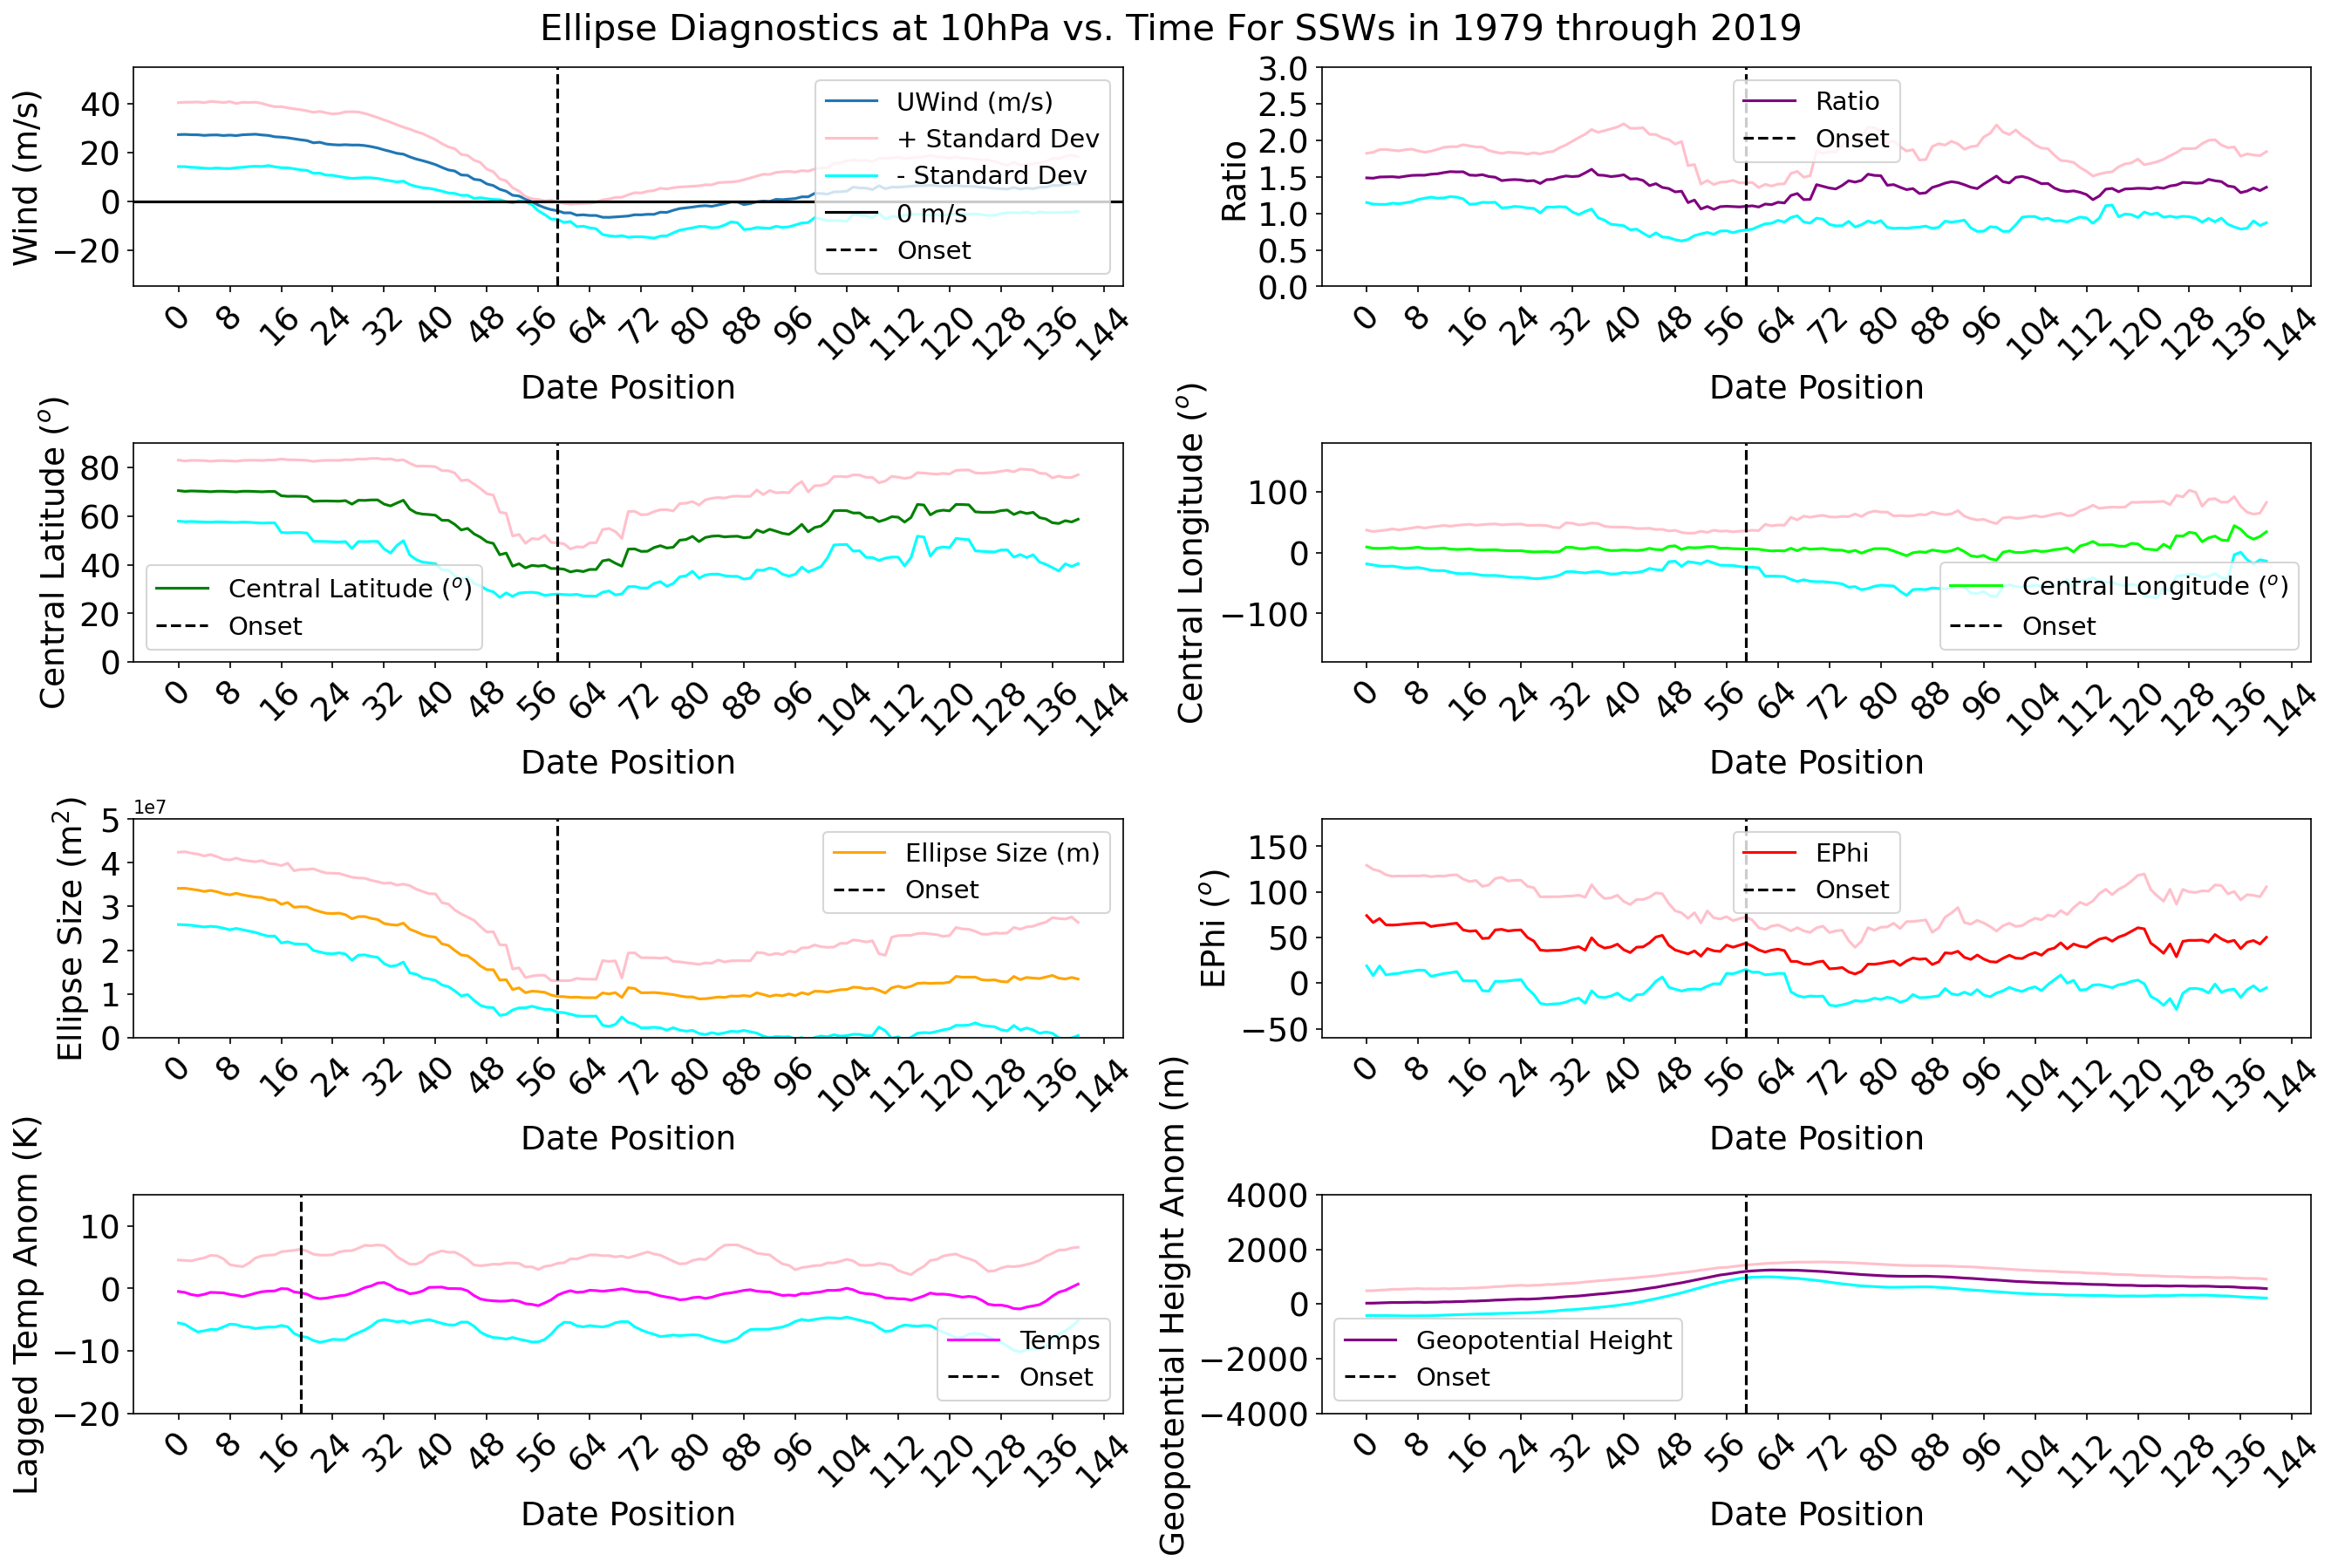

In [25]:
myLocator = mticker.MultipleLocator(8)
l2 = [x for x in range(len(sswwind10))]

fig = plt.figure(figsize=(18,12),dpi=150)
ax1 = plt.subplot(4,2,1)

plt.suptitle("Ellipse Diagnostics at 10hPa vs. Time For SSWs in 1979 through 2019", fontsize = 20)
ax1.plot(l2, sswwind10, label = "UWind (m/s)")
ax1.plot(l2, pos_sswwind, label = "+ Standard Dev", color = 'pink')
ax1.plot(l2, neg_sswwind, label = "- Standard Dev", color = 'cyan')
ax1.axhline(y=0, color='k', linestyle='-', label = "0 m/s")
ax1.set_ylabel("Wind (m/s)", fontsize = 18)
ax1.set_ylim(-35,55)
ax1.set_xlabel("Date Position", fontsize = 18)
ax1.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 14)

ax2 = plt.subplot(4,2,2)
ax2.plot(l2, sswrat10, label = "Ratio", color = "purple")
ax2.plot(l2, pos_sswrat, color = 'pink')
ax2.plot(l2, neg_sswrat, color = 'cyan')
ax2.set_ylabel("Ratio", fontsize = 18)
ax2.set_ylim(0,3)
ax2.set_xlabel("Date Position", fontsize = 18)
ax2.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 14)
    
ax3 = plt.subplot(4,2,3)
ax3.plot(l2, sswcenlt10, label = "Central Latitude ($^o$)", color = "green")
ax3.set_ylabel("Central Latitude ($^o$)", fontsize = 18)
ax3.plot(l2, pos_sswcenlt, color = 'pink')
ax3.plot(l2, neg_sswcenlt, color = 'cyan')
ax3.set_xlabel("Date Position", fontsize = 18)
ax3.set_ylim(0,90)
ax3.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 14)

ax4 = plt.subplot(4,2,4)
ax4.plot(l2, sswcenln10, label = "Central Longitude ($^o$)", color = "lime")
ax4.plot(l2, pos_sswcenln, color = 'pink')
ax4.plot(l2, neg_sswcenln, color = 'cyan')
ax4.set_ylabel("Central Longitude ($^o$)", fontsize = 18)
ax4.set_ylim(-180,180)
ax4.set_xlabel("Date Position", fontsize = 18)
ax4.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 14)

ax5 = plt.subplot(4,2,5)
ax5.plot(l2, sswsize10, label = "Ellipse Size (m)", color = "orange")
ax5.plot(l2, pos_sswsize, color = 'pink')
ax5.plot(l2, neg_sswsize, color = 'cyan')
ax5.set_ylabel("Ellipse Size (m$^2$)", fontsize = 18)
ax5.set_ylim(0,50000000)
ax5.set_xlabel("Date Position", fontsize = 18)
ax5.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 14)

ax6 = plt.subplot(4,2,6)
ax6.plot(l2, sswep10, label = "EPhi", color = "red")
ax6.plot(l2, pos_sswep, color = 'pink')
ax6.plot(l2, neg_sswep, color = 'cyan')
ax6.set_ylabel("EPhi ($^o$)", fontsize = 18)
ax6.set_ylim(-60,180)
ax6.set_xlabel("Date Position", fontsize = 18)
ax6.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)

ax7 = plt.subplot(4,2,7)
ax7.plot(l2, sswt10, label = "Temps", color = "magenta")
ax7.plot(l2, pos_sswt, color = 'pink')
ax7.plot(l2, neg_sswt, color = 'cyan')
ax7.set_ylabel("Lagged Temp Anom (K)", fontsize = 18)
ax7.set_ylim(-20,15)
ax7.set_xlabel("Date Position", fontsize = 18)
ax7.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.axvline(x=l2[19], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)

ax8 = plt.subplot(4,2,8)
ax8.plot(l2, sswg10, label = "Geopotential Height", color = "purple")
ax8.plot(l2, pos_sswg, color = 'pink')
ax8.plot(l2, neg_sswg, color = 'cyan')
ax8.set_ylabel("Geopotential Height Anom (m)", fontsize = 18)
ax8.set_ylim(-4000,4000)
ax8.set_xlabel("Date Position", fontsize = 18)
ax8.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)
    
plt.xticks(rotation=45,fontsize = 18)
plt.tight_layout()    
plt.savefig("SSWClimoTimeline.png")


In [37]:
wind1 = np.nanmean(wind10, axis=0)
ephi1 = np.nanmean(ephi10, axis=0)
rat1 = np.nanmean(rat10, axis=0)
size1 = np.nanmean(size10, axis=0)
cenlt1 = np.nanmean(cenlat10, axis=0)
cenln1 = np.nanmean(cenlon10, axis=0)
tem1 = np.nanmean(tmp, axis=0)
gp1 = np.nanmean(gp, axis=0)

In [40]:
rat10_sd = np.nanstd(rat1,axis=0)
wind10_sd = np.nanstd(wind1,axis=0)
cenlt10_sd = np.nanstd(cenlt1,axis=0)
cenln10_sd = np.nanstd(cenln1,axis=0)
size10_sd = np.nanstd(size1,axis=0)
ep10_sd = np.nanstd(ephi1,axis=0)
tem10_sd= np.nanstd(tmp,axis=0)
g10_sd = np.nanstd(gp,axis=0)

In [61]:
pos_rat = rat1 + rat10_sd
pos_wind = wind1 + wind10_sd
pos_cenlt = cenlt1 + cenlt10_sd
pos_cenln = cenln1 + cenln10_sd
pos_size = size1 + size10_sd
pos_ep = ephi1 + ep10_sd
pos_t = tem1 + tem10_sd
pos_g = gp1 + g10_sd

In [62]:
neg_rat = rat1 - rat10_sd
neg_wind = wind1 - wind10_sd
neg_cenlt = cenlt1 - cenlt10_sd
neg_cenln = cenln1 - cenln10_sd
neg_size = size1 - size10_sd
neg_ep = ephi1 - ep10_sd
neg_t = tem1 - tem10_sd
neg_g = gp1 - g10_sd

In [63]:
myLocator = mticker.MultipleLocator(30)

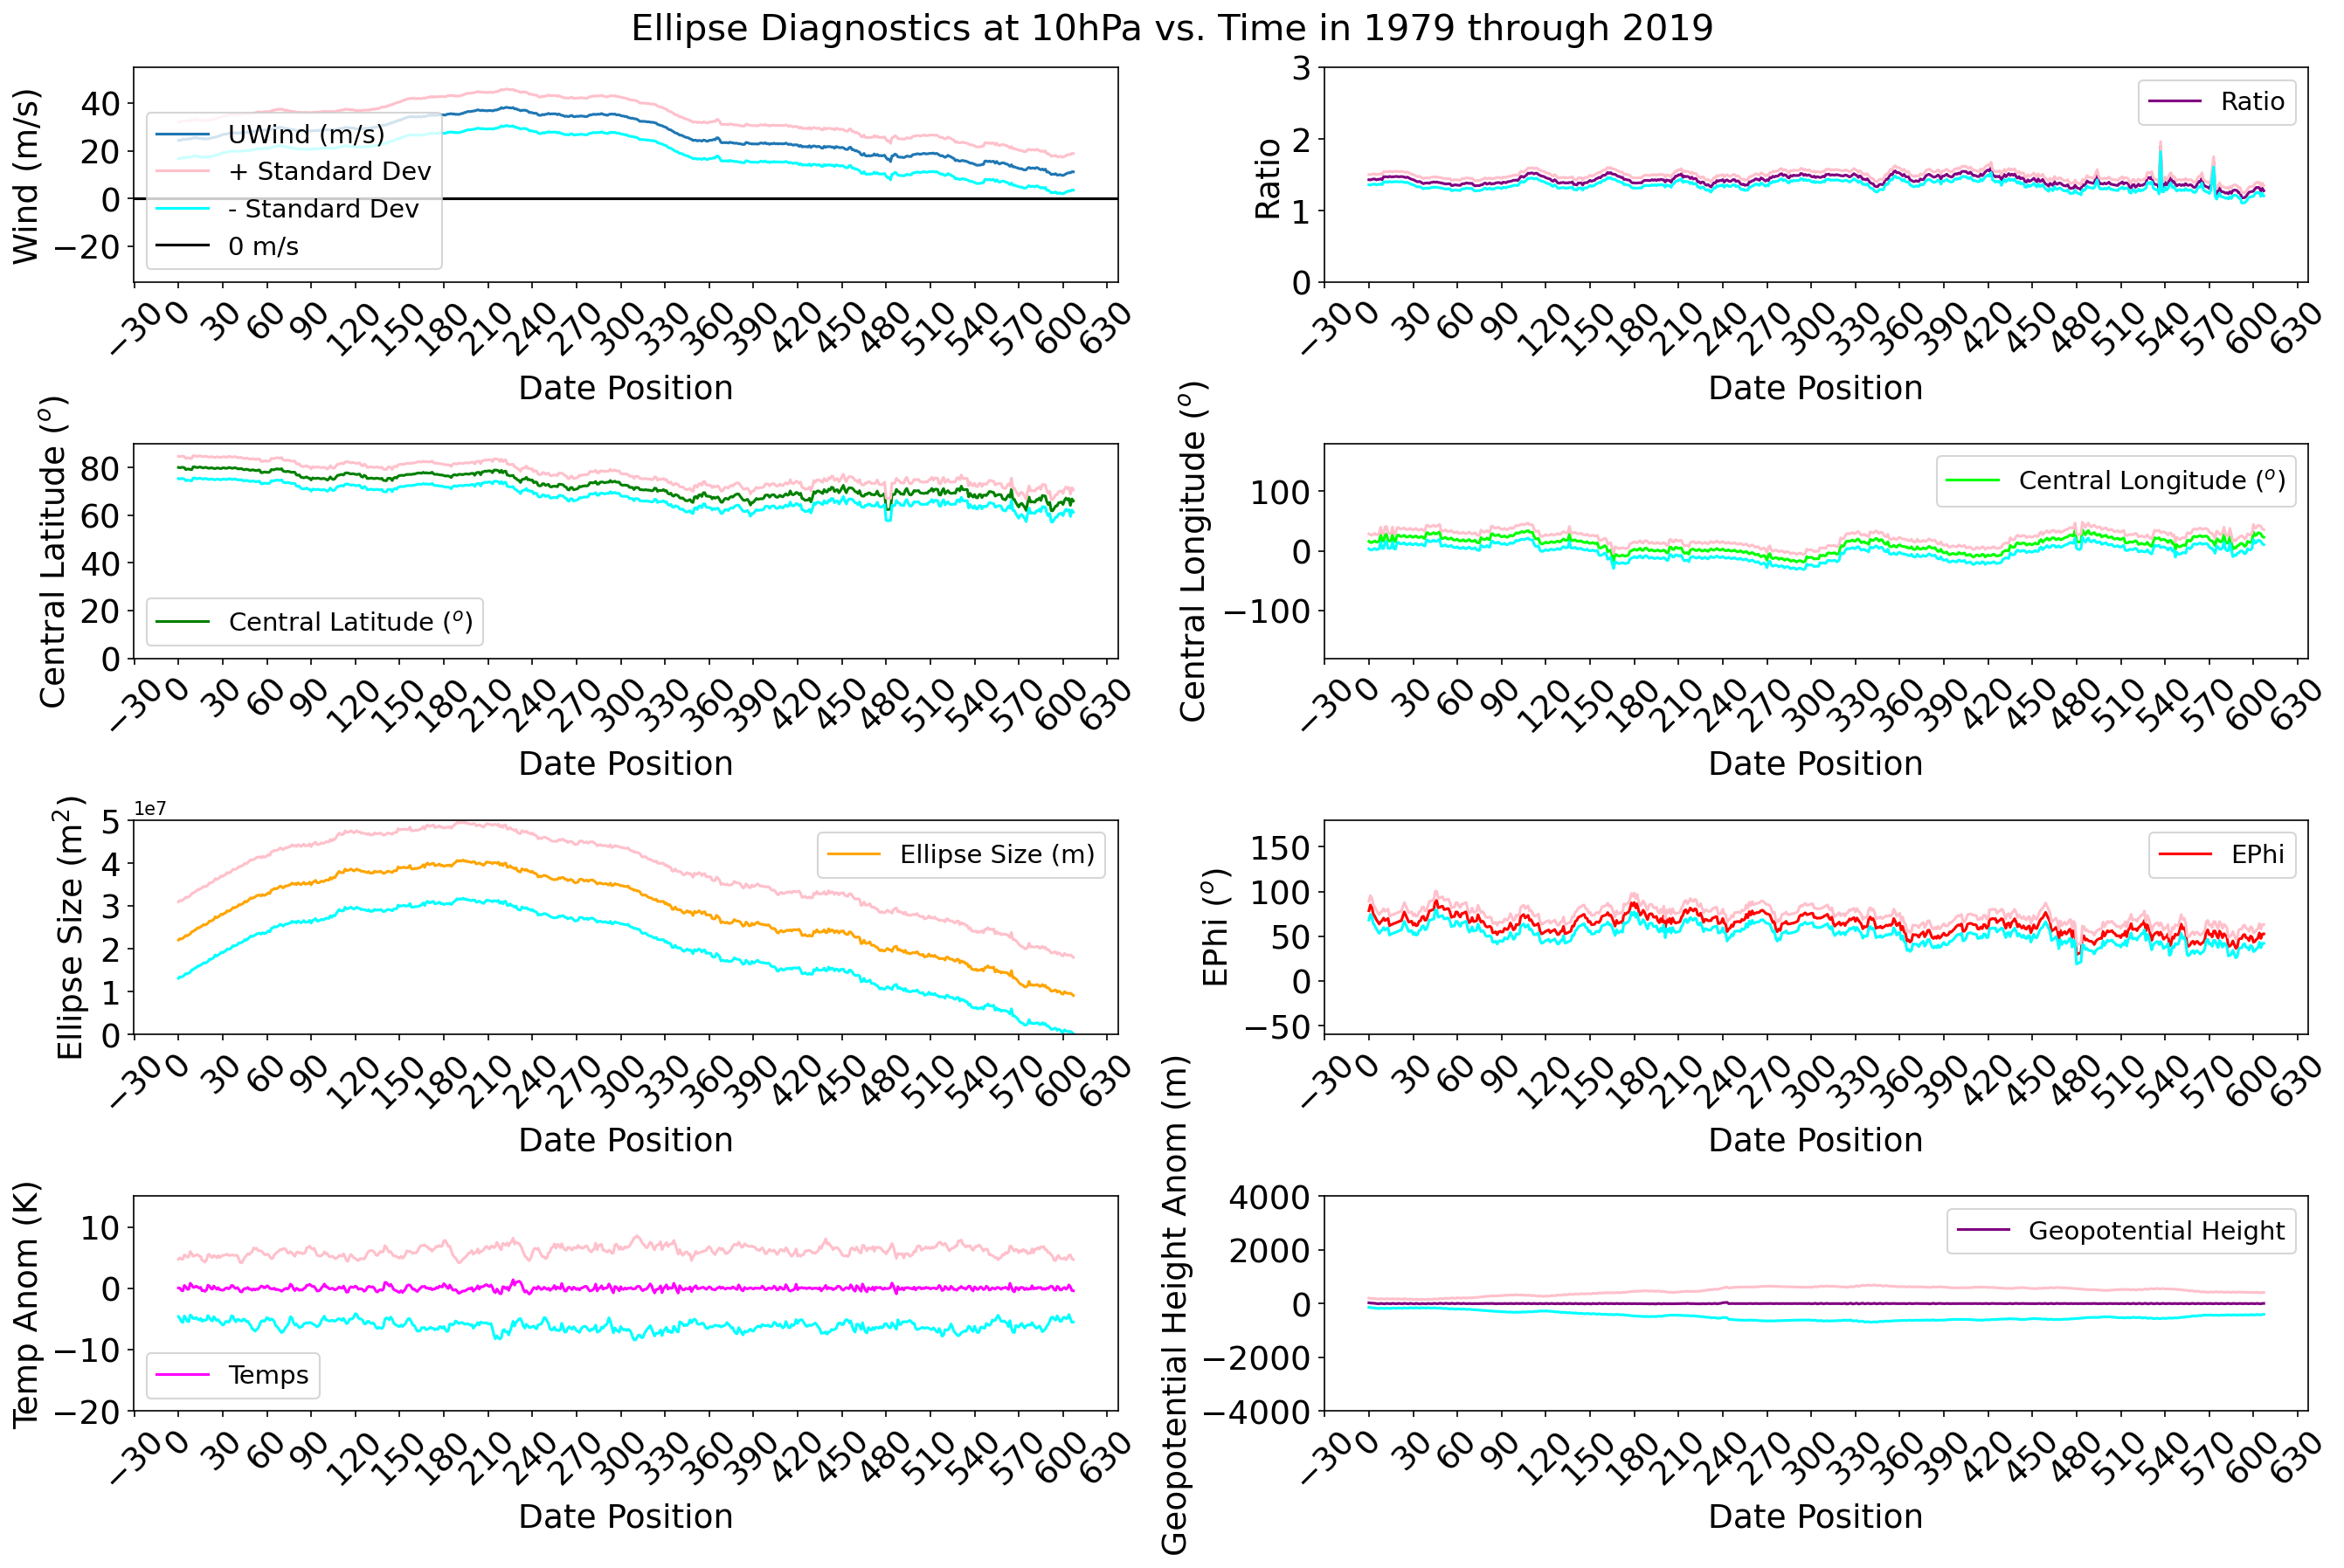

In [64]:
l2 = [x for x in range(len(wind1))]

fig = plt.figure(figsize=(18,12),dpi=150)
ax1 = plt.subplot(4,2,1)

plt.suptitle("Ellipse Diagnostics at 10hPa vs. Time in 1979 through 2019", fontsize = 20)
ax1.plot(l2, wind1, label = "UWind (m/s)")
ax1.plot(l2, pos_wind, label = "+ Standard Dev", color = 'pink')
ax1.plot(l2, neg_wind, label = "- Standard Dev", color = 'cyan')
ax1.axhline(y=0, color='k', linestyle='-', label = "0 m/s")
ax1.set_ylabel("Wind (m/s)", fontsize = 18)
ax1.set_ylim(-35,55)
ax1.set_xlabel("Date Position", fontsize = 18)
ax1.xaxis.set_major_locator(myLocator)
#plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 14)

ax2 = plt.subplot(4,2,2)
ax2.plot(l2, rat1, label = "Ratio", color = "purple")
ax2.plot(l2, pos_rat, color = 'pink')
ax2.plot(l2, neg_rat, color = 'cyan')
ax2.set_ylabel("Ratio", fontsize = 18)
ax2.set_ylim(0,3)
ax2.set_xlabel("Date Position", fontsize = 18)
ax2.xaxis.set_major_locator(myLocator)
#plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 14)
    
ax3 = plt.subplot(4,2,3)
ax3.plot(l2, cenlt1, label = "Central Latitude ($^o$)", color = "green")
ax3.set_ylabel("Central Latitude ($^o$)", fontsize = 18)
ax3.plot(l2, pos_cenlt, color = 'pink')
ax3.plot(l2, neg_cenlt, color = 'cyan')
ax3.set_xlabel("Date Position", fontsize = 18)
ax3.set_ylim(0,90)
ax3.xaxis.set_major_locator(myLocator)
#plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 14)

ax4 = plt.subplot(4,2,4)
ax4.plot(l2, cenln1, label = "Central Longitude ($^o$)", color = "lime")
ax4.plot(l2, pos_cenln, color = 'pink')
ax4.plot(l2, neg_cenln, color = 'cyan')
ax4.set_ylabel("Central Longitude ($^o$)", fontsize = 18)
ax4.set_ylim(-180,180)
ax4.set_xlabel("Date Position", fontsize = 18)
ax4.xaxis.set_major_locator(myLocator)
#plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 14)

ax5 = plt.subplot(4,2,5)
ax5.plot(l2, size1, label = "Ellipse Size (m)", color = "orange")
ax5.plot(l2, pos_size, color = 'pink')
ax5.plot(l2, neg_size, color = 'cyan')
ax5.set_ylabel("Ellipse Size (m$^2$)", fontsize = 18)
ax5.set_ylim(0,50000000)
ax5.set_xlabel("Date Position", fontsize = 18)
ax5.xaxis.set_major_locator(myLocator)
#plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 14)

ax6 = plt.subplot(4,2,6)
ax6.plot(l2, ephi1, label = "EPhi", color = "red")
ax6.plot(l2, pos_ep, color = 'pink')
ax6.plot(l2, neg_ep, color = 'cyan')
ax6.set_ylabel("EPhi ($^o$)", fontsize = 18)
ax6.set_ylim(-60,180)
ax6.set_xlabel("Date Position", fontsize = 18)
ax6.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
#plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)

ax7 = plt.subplot(4,2,7)
ax7.plot(l2, tem1, label = "Temps", color = "magenta")
ax7.plot(l2, pos_t, color = 'pink')
ax7.plot(l2, neg_t, color = 'cyan')
ax7.set_ylabel("Temp Anom (K)", fontsize = 18)
ax7.set_ylim(-20,15)
ax7.set_xlabel("Date Position", fontsize = 18)
ax7.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
#plt.axvline(x=l2[19], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)

ax8 = plt.subplot(4,2,8)
ax8.plot(l2, gp1, label = "Geopotential Height", color = "purple")
ax8.plot(l2, pos_g, color = 'pink')
ax8.plot(l2, neg_g, color = 'cyan')
ax8.set_ylabel("Geopotential Height Anom (m)", fontsize = 18)
ax8.set_ylim(-4000,4000)
ax8.set_xlabel("Date Position", fontsize = 18)
ax8.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = 18)
plt.yticks(fontsize = 18)
#plt.axvline(x=l2[59], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = 14)
    
plt.xticks(rotation=45,fontsize = 18)
plt.tight_layout()    
plt.savefig("ClimoTimeline.png")
